In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns


In [13]:
from sklearn.datasets import make_classification

In [ ]:
X,y=make_classification(n_samples=1000 ,n_features=2 ,n_classes=2 , n_clusters_per_class=1,
                        n_redundant=0 )

In [26]:
X , y

(array([[ 1.206708  ,  0.17717349],
        [ 2.83840149,  1.54928858],
        [ 0.93598994, -1.99614637],
        ...,
        [ 0.41681907, -1.85118478],
        [ 1.7104842 ,  0.20462572],
        [ 0.40110924, -1.50813539]]),
 array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
        1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
        1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
        0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
        0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 0, 

In [27]:
df=pd.DataFrame(X)

<Axes: xlabel='0', ylabel='1'>

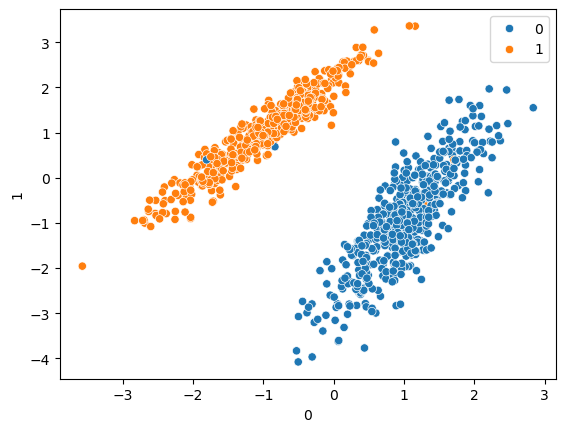

In [28]:
sns.scatterplot(x=df[0],y=df[1] , hue= y)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test= train_test_split( X , y , test_size=0.25 , random_state=10)

In [31]:
from sklearn.svm import  SVC
svc=SVC(kernel='linear')
svc.fit(X_train , y_train)

SVC(kernel='linear')

In [32]:
y_pred=svc.predict(X_test)

In [33]:
from sklearn.metrics import classification_report  , confusion_matrix

In [39]:
print(classification_report(y_test , y_pred))
print(confusion_matrix(y_test , y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00       130

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

[[120   0]
 [  0 130]]


<Axes: xlabel='0', ylabel='1'>

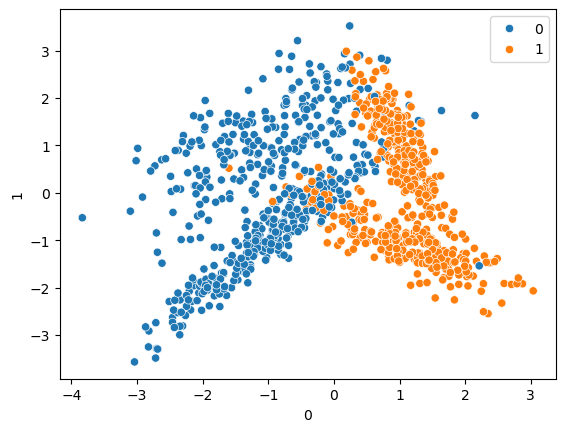

In [47]:
X,y=make_classification(n_samples=1000 ,n_features=2 ,n_classes=2 , n_clusters_per_class=2,
                        n_redundant=0 )
df=pd.DataFrame(X)
sns.scatterplot(x=df[0] , y=df[1] , hue=y)

- the data is overlapping
therefore it is required to use use different kernel for non-separable data

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test= train_test_split( X , y , test_size=0.25 , random_state=10)

In [49]:
#Using RBF kernel
rbf=SVC(kernel='rbf')
rbf.fit(X_train , y_train)

SVC()

In [50]:
y_pred_rbf=rbf.predict(X_test)

In [51]:
print(classification_report(y_test , y_pred_rbf))
print(confusion_matrix(y_test , y_pred_rbf))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       131
           1       0.94      0.94      0.94       119

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250

[[124   7]
 [  7 112]]


In [54]:
#Using polynomial kernel
poly=SVC(kernel='poly')
poly.fit(X_train , y_train)
y_pred_poly=poly.predict(X_test)
print(classification_report(y_test , y_pred_poly))
print(confusion_matrix(y_test , y_pred_poly))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       131
           1       0.95      0.82      0.88       119

    accuracy                           0.90       250
   macro avg       0.90      0.89      0.89       250
weighted avg       0.90      0.90      0.90       250

[[126   5]
 [ 21  98]]


In [55]:
#Using polynomial kernel
sig=SVC(kernel='sigmoid')
sig.fit(X_train , y_train)
y_pred_sig=sig.predict(X_test)
print(classification_report(y_test , y_pred_sig))
print(confusion_matrix(y_test , y_pred_sig))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       131
           1       0.79      0.77      0.78       119

    accuracy                           0.80       250
   macro avg       0.80      0.79      0.80       250
weighted avg       0.80      0.80      0.80       250

[[107  24]
 [ 27  92]]


## Hyperparameter Tuning

In [56]:
from sklearn.model_selection import GridSearchCV

params={
    'C':[0.1 , 10 , 100 , 1000],
    'gamma':[1, 0.1, 0.01 , 0.001],
    'kernel':['rbf']
}

In [59]:
grid=GridSearchCV(SVC() , param_grid=params ,refit=True , cv=5 , verbose=3)
grid.fit(X_train , y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.920 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.893 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
             verbose=3)

In [60]:
grid.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [61]:
y_pred_cv=grid.predict(X_test)
print(classification_report(y_test , y_pred_cv))
print(confusion_matrix(y_test , y_pred_cv))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       131
           1       0.96      0.93      0.94       119

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250

[[126   5]
 [  8 111]]
